In [ ]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
from scipy.stats import zscore
from math import radians, cos, sin, asin, sqrt
import pydot
import seaborn as sns
import keras
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import datasets, layers, models
import os, shutil
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
!pip install category_encoders
import category_encoders as ce
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
!pip install lime
import lime.lime_tabular

In [4]:
# load in data 
url = 'https://raw.githubusercontent.com/rindalafayyad17/263-Project/main/diabetes_012_health_indicators_BRFSS2015.csv'
diabetes = pd.read_csv(url)

In [5]:
diabetes.shape

(253680, 22)

In [7]:
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [8]:
# one hot encoder from sklearn was problematic in ordering
# income
one_hot = pd.get_dummies(diabetes['Income'])
one_hot.rename(columns = {1.0 : 'income1',
                          2.0 : 'income2',
                          3.0 : 'income3',
                          4.0 : 'income4',
                          5.0 : 'income5',
                          6.0 : 'income6',
                          7.0 : 'income7',
                          8.0 : 'income8'}, inplace = True)
                          
diabetes_final = pd.concat([diabetes,one_hot], axis = 1)

# education
one_hot = pd.get_dummies(diabetes['Education'])
one_hot.rename(columns = {1.0 : 'education1',
                          2.0 : 'education2',
                          3.0 : 'education3',
                          4.0 : 'education4',
                          5.0 : 'education5',
                          6.0 : 'education6'},
                          inplace = True)
                          
diabetes_final = pd.concat([diabetes_final,one_hot], axis = 1)

# age
one_hot = pd.get_dummies(diabetes['Age'])
one_hot.rename(columns = {1.0 : 'age1',
                          2.0 : 'age2',
                          3.0 : 'age3',
                          4.0 : 'age4',
                          5.0 : 'age5',
                          6.0 : 'age6',
                          7.0 : 'age7',
                          8.0 : 'age8', 
                          9.0 : 'age9',
                          10.0 : 'age10',
                          11.0 : 'age11',
                          12.0 : 'age12',
                          13.0 : 'age13'}, inplace = True)

diabetes_final = pd.concat([diabetes_final,one_hot], axis = 1)

# drop vars
diabetes_final.drop(['Income', 'Age', 'Education'], axis = 1)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,age4,age5,age6,age7,age8,age9,age10,age11,age12,age13
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0


In [9]:
# check the counts for 0 no diabetes, 1 prediabetic, 2 diabetic
diabetes['Diabetes_012'].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

In [10]:
# merge the prediabetic and not diabetic  
diabetes.loc[diabetes['Diabetes_012'] == 0.0, "Diabetes_012"] = 1



In [11]:
# check the counts for 0 no diabetes, 1 diabetic
diabetes['Diabetes_012'].value_counts()

1.0    218334
2.0     35346
Name: Diabetes_012, dtype: int64

In [13]:
# need to make training, validation and test split
features = diabetes_final.drop(['Diabetes_012', 'Income', 'Education', 'Age'], axis = 1)
print(features.head())


   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0   
1     0.0       0.0        0.0  25.0     1.0     0.0                   0.0   
2     1.0       1.0        1.0  28.0     0.0     0.0                   0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0                   0.0   
4     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  age4  age5  age6  age7  age8  age9  \
0           0.0     0.0      1.0  ...     0     0     0     0     0     1   
1           1.0     0.0      0.0  ...     0     0     0     1     0     0   
2           0.0     1.0      0.0  ...     0     0     0     0     0     1   
3           1.0     1.0      1.0  ...     0     0     0     0     0     0   
4           1.0     1.0      1.0  ...     0     0     0     0     0     0   

   age10  age11  age12  age13  
0      0      0      0      0  
1   

In [15]:
# reshape labels and encode them
ce_OHE = ce.OneHotEncoder(cols=['Diabetes_012'])
labels = ce_OHE.fit_transform(diabetes)
labels = labels.iloc[:,0:2]


In [17]:
# split into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(features, labels,
    test_size=0.2, shuffle = True, random_state = 356)

# Use the same function above to spliut the training into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 356) # 0.25 x 0.8 = 0.2

In [18]:
print(X_train.shape, X_val.shape, X_test.shape)

(152208, 45) (50736, 45) (50736, 45)


In [19]:
# build and compile model 
# Define model -- should change model name
model = keras.Sequential([
  layers.Dense(256, activation='relu', input_dim = 45),
  layers.Dropout(0.5),

  layers.Dense(128, activation='relu'), 
  layers.Dropout(0.5),

  layers.Dense(32, activation='relu'), 

  layers.Dense(2, activation='sigmoid') # 2 categories
])

# model compile function
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [21]:
history = model.fit(X_train, 
          y_train, 
          epochs = 30, #change epochs to 100 after testing
          batch_size = 200,
          validation_data=(X_val, y_val)
          )

Epoch 1/30
762/762 [==============================] - 12s 13ms/step - loss: 0.3818 - accuracy: 0.8599 - val_loss: 0.3282 - val_accuracy: 0.8607
Epoch 2/30
762/762 [==============================] - 9s 11ms/step - loss: 0.3319 - accuracy: 0.8619 - val_loss: 0.3206 - val_accuracy: 0.8652
Epoch 3/30
762/762 [==============================] - 8s 11ms/step - loss: 0.3266 - accuracy: 0.8620 - val_loss: 0.3191 - val_accuracy: 0.8657
Epoch 4/30
762/762 [==============================] - 8s 11ms/step - loss: 0.3242 - accuracy: 0.8624 - val_loss: 0.3164 - val_accuracy: 0.8660
Epoch 5/30
762/762 [==============================] - 5s 6ms/step - loss: 0.3231 - accuracy: 0.8631 - val_loss: 0.3183 - val_accuracy: 0.8617
Epoch 6/30
762/762 [==============================] - 5s 6ms/step - loss: 0.3220 - accuracy: 0.8633 - val_loss: 0.3169 - val_accuracy: 0.8656
Epoch 7/30
762/762 [==============================] - 5s 6ms/step - loss: 0.3212 - accuracy: 0.8629 - val_loss: 0.3158 - val_accuracy: 0.8666
E

In [ ]:
# from google.colab import drive
# drive.mount('/gdrive')

In [24]:
# model.save('/gdrive/MyDrive/diabetes2.h5')


In [26]:
# load model
new_model = tf.keras.models.load_model('/gdrive/MyDrive/diabetes2.h5')

In [ ]:
# Show the model architecture
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               11776     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 32)                4128      
                                                                 
 dense_19 (Dense)            (None, 2)                 66        
                                                                 
Total params: 48,866
Trainable params: 48,866
Non-trai

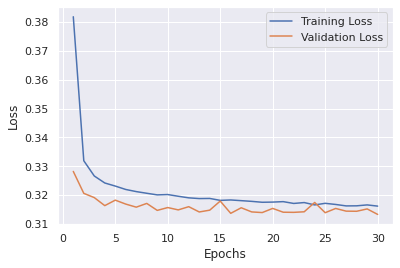

In [28]:
# # plot of validation loss and train loss
# import seaborn as sns
# sns.set()

# train_acc  = history.history['accuracy']
# train_loss = history.history['loss']
# val_acc  = history.history['val_accuracy']
# val_loss = history.history['val_loss']

# epochs = range(1, len(train_acc) + 1)

# plt.plot(epochs, train_loss, label = 'Training Loss')
# plt.plot(epochs, val_loss, label = 'Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend();

In [29]:
# test set accuracy 
test_loss, test_acc = new_model.evaluate(X_test, y_test)
print("The test set accuracy is: ", test_acc)

1586/1586 [==============================] - 6s 3ms/step - loss: 0.3126 - accuracy: 0.8651
The test set accuracy is:  0.8651056289672852


In [30]:
# predictions on test set held out
y_proba = new_model.predict(X_test)
print(y_proba)
# make values predicted binary and not vector of probs
y_pred = y_proba.argmax(axis = 1) # want 0,1 vector
y_pred

[[0.9941214  0.00600514]
 [0.9887832  0.01121303]
 [0.8324821  0.1696431 ]
 ...
 [0.88594794 0.11200783]
 [0.94513166 0.05387279]
 [0.9542136  0.04398602]]


array([0, 0, 0, ..., 0, 0, 0])

In [31]:
# need to y_test to be single vector of 0,1 again
y_test_lab = diabetes.iloc[y_test.index, :]["Diabetes_012"] # must check if this actually works as desired
y_test_lab # need to change these so 2 and 1 make sense, 2 is diabetic, 0 is prediabetic
y_test_lab[y_test_lab == 1] = 0
y_test_lab[y_test_lab == 2] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


Confusion Matrix

[[43038   601]
 [ 6243   854]]

Accuracy: 0.8651

Recall: 0.1203
Precision: 0.5869


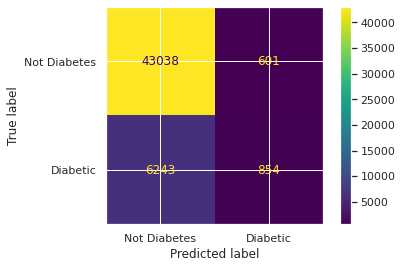

In [35]:
# create confusiton matrix, calc precision and recall 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab, y_pred)
print('Confusion Matrix\n')
print(confusion)
cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()

#importing accuracy_score, precision_score, recall_score, \
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test_lab, y_pred)))
print('Recall: %.4f' % recall_score(y_test_lab, y_pred))
print('Precision: %.4f' % precision_score(y_test_lab, y_pred))


##Subset Data by Income, Education, Gender, Age

### I.Income

When we subset by income we split into those under and over $35,000. However, a majority of the survey respondents reported lower than $10,000 income. 










In [36]:
# 8 is above $75,000, 5 is below 35,000
 # maybe start with split of below 5 and above 5 
diabetes['Income'].value_counts()

8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: Income, dtype: int64

**Note: we are not going to refit the models to the training data but instead want to observe how well it fits to the testing dataset.**

In [37]:
# function to subset which incomes you want
X_test.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,age4,age5,age6,age7,age8,age9,age10,age11,age12,age13
193256,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
52416,0.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0
125094,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0
74892,0.0,0.0,1.0,35.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1357,0.0,1.0,1.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
def subset_income(test_features,test_target, split):
  # pretty sure i coudl have done minus indx below and been shorter, oh well
  # X test of only > 5 income 
  if split == 5: 

    # X test of only <= 5 income 
    features_high = test_features[(test_features["income6"] == 1.0) | (test_features["income7"] == 1.0) | (test_features["income8"] == 1.0)]
    high_indx = features_high.index
    features_low = test_features[~test_features.index.isin(high_indx)]

    # y test of only same subsets above
    y_test_high = test_target[y_test.index.isin(high_indx)]
    y_test_low = test_target[~y_test.index.isin(high_indx)]

  elif split == 6: 
    # X test of only <= 6 income 
    features_high = test_features[(test_features["income7"] == 1.0) | (test_features["income8"] == 1.0)]
    high_indx = features_high.index
    features_low = test_features[~test_features.index.isin(high_indx)]

    # y test of only same subsets above
    y_test_high = test_target[test_target.index.isin(high_indx)]
    y_test_low = test_target[~test_target.index.isin(high_indx)]

  return(features_high, features_low, y_test_high, y_test_low)


In [39]:
features_high,features_low, y_test_high, y_test_low = subset_income(X_test,y_test,5)

# check sizes of datasets, why are these os small
print(features_high.shape,features_low.shape,y_test_high.shape, y_test_low.shape)

(33831, 45) (16905, 45) (33831, 2) (16905, 2)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


0.0    30278
1.0     3553
Name: Diabetes_012, dtype: int64
Confusion Matrix

[[30146   132]
 [ 3338   215]]

Accuracy: 0.8974

Recall: 0.0605
Precision: 0.6196


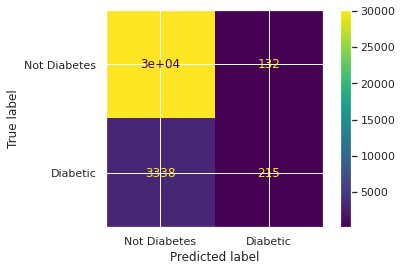

In [41]:
# predict probabilities for high income
y_proba_high = new_model.predict(features_high)
y_pred_high = y_proba_high.argmax(axis = 1) # want 0,1 vector




y_test_lab_high = diabetes.iloc[y_test_high.index, :]['Diabetes_012']
y_test_lab_high # need to change labels to be 0,1 instead of 1,2 currently
y_test_lab_high[y_test_lab_high == 1] = 0
y_test_lab_high[y_test_lab_high == 2] = 1
print(y_test_lab_high.value_counts())


# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_high, y_pred_high)
print('Confusion Matrix\n')
print(confusion)

cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()


#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test_lab_high, y_pred_high)))
print('Recall: %.4f' % recall_score(y_test_lab_high, y_pred_high))
print('Precision: %.4f' % precision_score(y_test_lab_high, y_pred_high))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


Confusion Matrix

[[12892   469]
 [ 2905   639]]

Accuracy: 0.8004

Recall: 0.1803
Precision: 0.5767


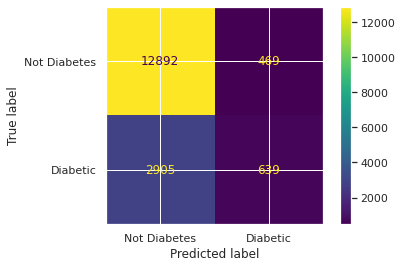

In [42]:
# predict probabilities for low income
y_proba_low = new_model.predict(features_low)
y_pred_low = y_proba_low.argmax(axis = 1) # want 0,1,2 vector

y_test_lab_low = diabetes.iloc[y_test_low.index, :]['Diabetes_012']
y_test_lab_low # need to change labels to be 0,1 instead of 1,2 currently
y_test_lab_low[y_test_lab_low == 1] = 0
y_test_lab_low[y_test_lab_low == 2] = 1


# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_low, y_pred_low)
print('Confusion Matrix\n')
print(confusion)

cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()

#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test_lab_low, y_pred_low)))
print('Recall: %.4f' % recall_score(y_test_lab_low, y_pred_low))
print('Precision: %.4f' % precision_score(y_test_lab_low, y_pred_low))

##2. Education

In [43]:
# 4 is education of high school grad, so split at 4
print(diabetes['Education'].value_counts())

# X test of only <= 4 education 
features_high_edu = X_test[(X_test["education5"] == 1.0) | (X_test["education6"] == 1.0)]
high_edu_indx = features_high_edu.index
features_low_edu = X_test[~X_test.index.isin(high_edu_indx)]


# y test of only same subsets above
y_test_high = y_test[y_test.index.isin(high_edu_indx)]
y_test_low = y_test[~y_test.index.isin(high_edu_indx)]

print(features_high_edu.shape, y_test_high.shape, features_low_edu.shape, y_test_low.shape)


6.0    107325
5.0     69910
4.0     62750
3.0      9478
2.0      4043
1.0       174
Name: Education, dtype: int64
(35466, 45) (35466, 2) (15270, 45) (15270, 2)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


0.0    31361
1.0     4105
Name: Diabetes_012, dtype: int64
Confusion Matrix

[[31067   294]
 [ 3697   408]]

Accuracy: 0.8875

Recall: 0.0994
Precision: 0.5812


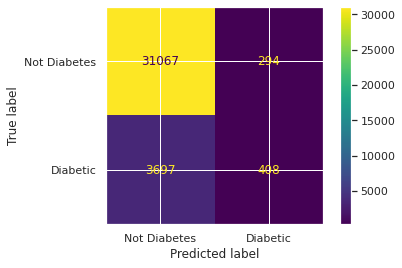

In [44]:
# predict probabilities for high education
y_proba_high = new_model.predict(features_high_edu)
y_pred_high = y_proba_high.argmax(axis = 1) # want 0,1 vector
y_pred_high.shape

y_test_lab_high = diabetes.iloc[y_test_high.index, :]['Diabetes_012']
y_test_lab_high # need to change labels to be 0,1 instead of 1,2 currently
y_test_lab_high[y_test_lab_high == 1] = 0
y_test_lab_high[y_test_lab_high == 2] = 1
print(y_test_lab_high.value_counts())


# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_high, y_pred_high)
print('Confusion Matrix\n')
print(confusion)

cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()


#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test_lab_high, y_pred_high)))
print('Recall: %.4f' % recall_score(y_test_lab_high, y_pred_high))
print('Precision: %.4f' % precision_score(y_test_lab_high, y_pred_high))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


0.0    12278
1.0     2992
Name: Diabetes_012, dtype: int64
Confusion Matrix

[[11971   307]
 [ 2546   446]]

Accuracy: 0.8132

Recall: 0.1491
Precision: 0.5923


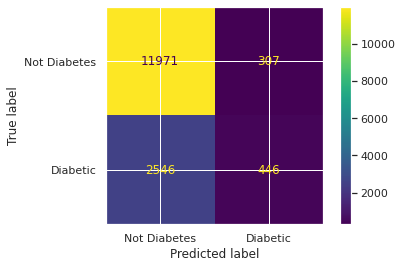

In [45]:
# predict probabilities for high education
y_proba_low = new_model.predict(features_low_edu)
y_pred_low = y_proba_low.argmax(axis = 1) # want 0,1 vector

y_test_lab_low = diabetes.iloc[y_test_low.index, :]['Diabetes_012']
y_test_lab_low # need to change labels to be 0,1 instead of 1,2 currently
y_test_lab_low[y_test_lab_low == 1] = 0
y_test_lab_low[y_test_lab_low == 2] = 1
print(y_test_lab_low.value_counts())


# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_low, y_pred_low)
print('Confusion Matrix\n')
print(confusion)

cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()


#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test_lab_low, y_pred_low)))
print('Recall: %.4f' % recall_score(y_test_lab_low, y_pred_low))
print('Precision: %.4f' % precision_score(y_test_lab_low, y_pred_low))

## 3. Age

In [46]:
# split into binary above 8 and below 8 where 8 is 55 to 59 years old
print(diabetes['Age'].value_counts())

# X test of only <= 4 education 
features_old = X_test[(X_test["age9"] == 1.0) | (X_test["age10"] == 1.0)| (X_test["age11"] == 1.0)| (X_test["age12"] == 1.0)| (X_test["age13"] == 1.0)]
old_index = features_old.index
features_young = X_test[~X_test.index.isin(old_index)]


# y test of only same subsets above
y_test_old = y_test[y_test.index.isin(old_index)]
y_test_young = y_test[~y_test.index.isin(old_index)]

print(features_old.shape, y_test_old.shape, features_young.shape, y_test_young.shape)


9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64
(24579, 45) (24579, 2) (26157, 45) (26157, 2)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


0.0    19726
1.0     4853
Name: Diabetes_012, dtype: int64
Confusion Matrix

[[19299   427]
 [ 4218   635]]

Accuracy: 0.8110

Recall: 0.1308
Precision: 0.5979


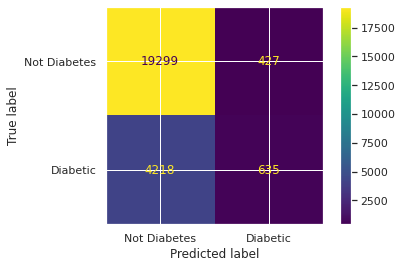

In [47]:
# predict probabilities for older
y_proba_old = new_model.predict(features_old)
y_pred_old = y_proba_old.argmax(axis = 1) # want 0,1 vector
y_pred_old.shape

y_test_lab_old = diabetes.iloc[y_test_old.index, :]['Diabetes_012']
y_test_lab_old # need to change labels to be 0,1 instead of 1,2 currently
y_test_lab_old[y_test_lab_old == 1] = 0
y_test_lab_old[y_test_lab_old == 2] = 1
print(y_test_lab_old.value_counts())


# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_old, y_pred_old)
print('Confusion Matrix\n')
print(confusion)

cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()


#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test_lab_old, y_pred_old)))
print('Recall: %.4f' % recall_score(y_test_lab_old, y_pred_old))
print('Precision: %.4f' % precision_score(y_test_lab_old, y_pred_old))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


0.0    23913
1.0     2244
Name: Diabetes_012, dtype: int64
Confusion Matrix

[[23739   174]
 [ 2025   219]]

Accuracy: 0.9159

Recall: 0.0976
Precision: 0.5573


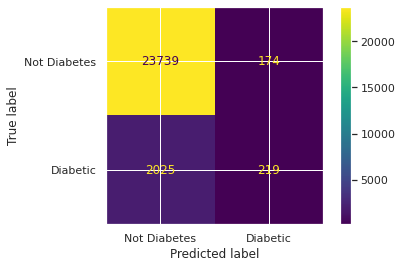

In [48]:
# predict probabilities for younger
y_proba_young = new_model.predict(features_young)
y_pred_young = y_proba_young.argmax(axis = 1) # want 0,1 vector
y_pred_young.shape

y_test_lab_young = diabetes.iloc[y_test_young.index, :]['Diabetes_012']
y_test_lab_young # need to change labels to be 0,1 instead of 1,2 currently
y_test_lab_young[y_test_lab_young == 1] = 0
y_test_lab_young[y_test_lab_young == 2] = 1
print(y_test_lab_young.value_counts())


# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_young, y_pred_young)
print('Confusion Matrix\n')
print(confusion)

cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()


#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test_lab_young, y_pred_young)))
print('Recall: %.4f' % recall_score(y_test_lab_young, y_pred_young))
print('Precision: %.4f' % precision_score(y_test_lab_young, y_pred_young))

In [49]:
## 4. Gender

# 0 female, 1 is male
print(diabetes['Sex'].value_counts())

# X test split
features_female = X_test[(X_test["Sex"] == 0.0)]
female_index = features_female.index
features_male = X_test[~X_test.index.isin(female_index)]


# y test of only same subsets above
y_test_female = y_test[y_test.index.isin(female_index)]
y_test_male = y_test[~y_test.index.isin(female_index)]

print(features_female.shape, y_test_female.shape, features_male.shape, y_test_male.shape)

0.0    141974
1.0    111706
Name: Sex, dtype: int64
(28463, 45) (28463, 2) (22273, 45) (22273, 2)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


0.0    24784
1.0     3679
Name: Diabetes_012, dtype: int64
Confusion Matrix

[[24407   377]
 [ 3199   480]]

Accuracy: 0.8744

Recall: 0.1305
Precision: 0.5601


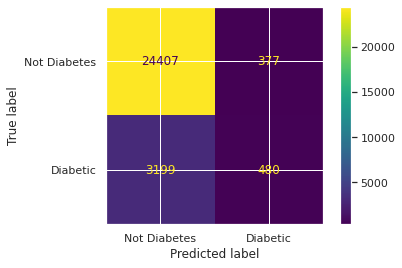

In [50]:
# predict probabilities for female
y_proba_female = new_model.predict(features_female)
y_pred_female = y_proba_female.argmax(axis = 1) # want 0,1 vector
y_pred_female.shape

y_test_lab_female = diabetes.iloc[y_test_female.index, :]['Diabetes_012']
y_test_lab_female # need to change labels to be 0,1 instead of 1,2 currently
y_test_lab_female[y_test_lab_female == 1] = 0
y_test_lab_female[y_test_lab_female == 2] = 1
print(y_test_lab_female.value_counts())


# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_female, y_pred_female)
print('Confusion Matrix\n')
print(confusion)

cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()


#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test_lab_female, y_pred_female)))
print('Recall: %.4f' % recall_score(y_test_lab_female, y_pred_female))
print('Precision: %.4f' % precision_score(y_test_lab_female, y_pred_female))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


0.0    18855
1.0     3418
Name: Diabetes_012, dtype: int64
Confusion Matrix

[[18631   224]
 [ 3044   374]]

Accuracy: 0.8533

Recall: 0.1094
Precision: 0.6254


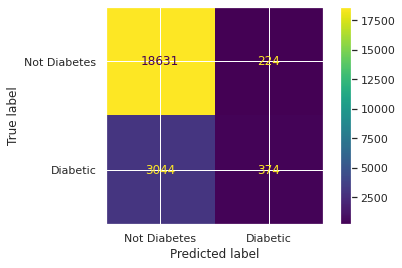

In [51]:
# predict probabilities for male
y_proba_male = new_model.predict(features_male)
y_pred_male = y_proba_male.argmax(axis = 1) # want 0,1 vector
y_pred_male.shape

y_test_lab_male = diabetes.iloc[y_test_male.index, :]['Diabetes_012']
y_test_lab_male # need to change labels to be 0,1 instead of 1,2 currently
y_test_lab_male[y_test_lab_male == 1] = 0
y_test_lab_male[y_test_lab_male == 2] = 1
print(y_test_lab_male.value_counts())


# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_male, y_pred_male)
print('Confusion Matrix\n')
print(confusion)

cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()


#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test_lab_male, y_pred_male)))
print('Recall: %.4f' % recall_score(y_test_lab_male, y_pred_male))
print('Precision: %.4f' % precision_score(y_test_lab_male, y_pred_male))

## Lime (Local interpretable Model-Agnostic Explanations)

We see that there appears to be some differences in the models accuracy between "low" and "high" income earners, similarly with hihg/low education respondents. As a result, we can try to apply a black box method of interpretation for the neural network to see how the network makes decisions, at the local level, for a respondent which is considered low income. 




In [52]:
## LIME

# changed x to x_train
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values[:,:], feature_names=list(X_train.columns), mode='classification')


In [53]:
# added top_labels=1
exp = explainer.explain_instance(X_test.values[51,:], new_model.predict, num_features=45, top_labels=5)

/usr/local/lib/python3.7/dist-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


In [54]:
exp.show_in_notebook()